In [4]:
import pandas as pd
import mysql as msql

In [5]:
df = pd.read_csv("Produits.csv")

In [6]:
df['CONDITION'].unique()

array(['BIDON', 'BOUTE', 'FLACO', 'SPRAY', 'CARTO', 'KG', 'SAC', 'PIECE',
       'SACHE', 'BARQU', 'BOITE', 'UNI', 'POT', 'CAISS', 'PAQUE', 'BAC',
       'SEAU', 'PACK', 'BRICK', 'PINGO', 'SQUEE', 'TUBE', 'FARDE',
       'BOCAL', 'POCHE', 'BRK', 'TUBO', 'ETUI', 'LOT', 'COLIS', 'PLATE',
       'BIB'], dtype=object)

In [7]:
df['FAMILLE ARTICLE'].unique()

array(['HUILES', 'FROMAGES', 'CREMERIE', 'LAIT', 'BEURRE ET MARGARINE',
       'CHARCUTERIE', 'OEUFS ET DERIVES', 'SAUCES ET CONDIMENTS',
       'FONDS ET SAUCES DESHYDRATES', 'OLIVES',
       'CONSERVES LEGUMES ET PLATS PREPARES', 'CONSERVES DE FRUITS',
       'FRUITS SECS', 'CONFITURE - MIEL', 'PRODUITS DE  PATISSERIE',
       'PRODUITS DE LA MER', 'PATES ET AUTRES FECULENTS', 'FARINE',
       'SUCRE', 'CONFISERIE', 'LEVURES', 'VIANDE',
       'BISCOTTES ET DERIVES BISCUITS', 'EPICES ET AROMATES',
       'CAFE THE CHOCOLAT', 'BOISSONS DIVERSES',
       'ALCOOLS CHAMPAGNE MOUSSEUX VINS', 'PRODUITS HYGIENE ET ENTRETIEN',
       'JETABLE', 'SURGELES'], dtype=object)

In [15]:
df[df['Code article'].duplicated()]

,Code article,LIBELLE ARTICLE,FAMILLE ARTICLE,CONDITION,PU HT
418,8809,SAUCE SOJA KIKOMAN SUCREE 975ML,SAUCES ET CONDIMENTS,BOUTE,"9,51"
929,17480,LASAGNE BARILLA 500G,PATES ET AUTRES FECULENTS,BOITE,"2,90"


In [9]:
df[df["Code article"] == 8809]

,Code article,LIBELLE ARTICLE,FAMILLE ARTICLE,CONDITION,PU HT
301,8809,SAUCE ANGLAISE - WORCESTERSHIRE - 300 ML,SAUCES ET CONDIMENTS,FLACO,"2,45"
418,8809,SAUCE SOJA KIKOMAN SUCREE 975ML,SAUCES ET CONDIMENTS,BOUTE,"9,51"


In [14]:
df[df["Code article"] == 17480]

,Code article,LIBELLE ARTICLE,FAMILLE ARTICLE,CONDITION,PU HT
885,17480,CANNELLONI ITALPASTA 250 G,PATES ET AUTRES FECULENTS,ETUI,"1,29"
929,17480,LASAGNE BARILLA 500G,PATES ET AUTRES FECULENTS,BOITE,"2,90"


In [7]:
from sqlalchemy import create_engine
from sqlalchemy import URL
import pymysql

url_object = URL.create(
    "mysql+mysqlconnector",
    username="jcaldeira",
    password="jcaldeira#020408@",  # plain (unescaped) text
    host="192.168.56.101",
    database="simplon",
)

sqlEngine = create_engine(url_object, pool_recycle=3600)
dbConnection = sqlEngine.connect()

C:\Users\jhona\AppData\Local\Temp\ipykernel_21104\1094588832.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plt.set_xticklabels(plt.get_xticklabels(), rotation=90)


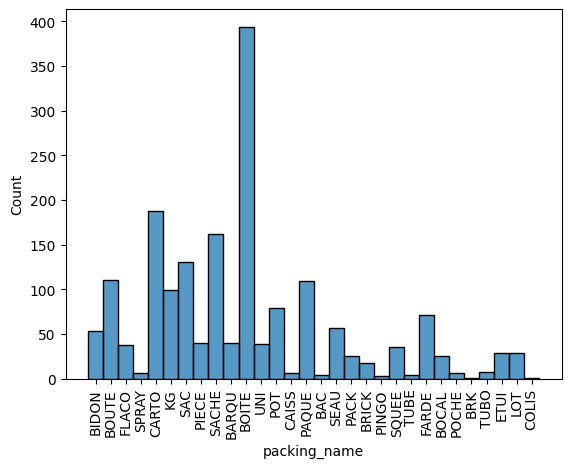

In [15]:
from sqlalchemy import create_engine
import mysql.connector as mysql
from sqlalchemy import URL
import pandas as pd
import seaborn as sns

url_object = URL.create(
    "mysql+mysqlconnector",
    username="jcaldeira",
    password="Brii#020408",  # plain (unescaped) text
    host="localhost",
    database="simplon",
)

sqlEngine = create_engine(url_object, pool_recycle=3600)
dbConnection = sqlEngine.connect()

sql = ("select p.product_name, tpt.packing_name, pt.product_name_type "
       "from tb_product p "
       "inner join tb_packing_type tpt on p.id_packing_type = tpt.id_packing_type "
       "inner join tb_product_type pt on p.id_packing_type = pt.id_product_type"
       )
df = pd.read_sql(sql, dbConnection)
plt = sns.histplot(data=df['packing_name'],)
_ = plt.set_xticklabels(plt.get_xticklabels(), rotation=90)


Index(['BOITE', 'CARTO', 'SACHE', 'SAC', 'BOUTE', 'PAQUE', 'KG', 'POT',
       'FARDE', 'SEAU', 'BIDON', 'BARQU', 'PIECE', 'UNI', 'FLACO', 'SQUEE',
       'LOT', 'ETUI', 'PACK', 'BOCAL', 'BRICK', 'TUBO', 'CAISS', 'SPRAY',
       'POCHE', 'BAC', 'TUBE', 'PINGO', 'BRK', 'COLIS'],
      dtype='object', name='packing_name')


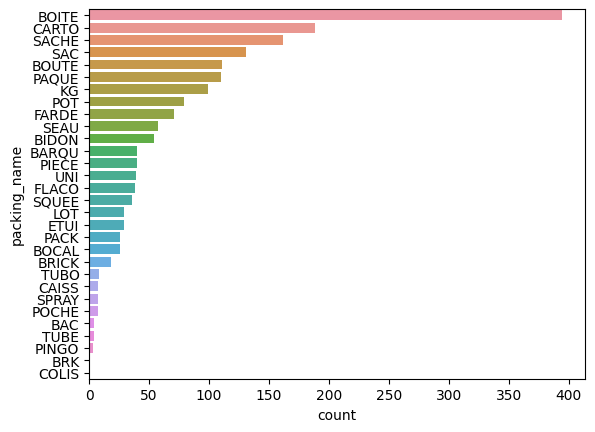

In [20]:
from sqlalchemy import create_engine
import mysql.connector as mysql
from sqlalchemy import URL
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url_object = URL.create(
    "mysql+mysqlconnector",
    username="jcaldeira",
    password="Brii#020408",  # plain (unescaped) text
    host="localhost",
    database="simplon",
)

sqlEngine = create_engine(url_object, pool_recycle=3600)
dbConnection = sqlEngine.connect()

sql = ("select p.product_name, tpt.packing_name, pt.product_name_type "
       "from tb_product p "
       "inner join tb_packing_type tpt on p.id_packing_type = tpt.id_packing_type "
       "inner join tb_product_type pt on p.id_packing_type = pt.id_product_type"
       )

df = pd.read_sql(sql, dbConnection)
arr_order = df['packing_name'].value_counts().index
my_plt = sns.countplot(data=df,y='packing_name', order=arr_order)
my_plt.set_xticklabels(my_plt.get_xticklabels(), rotation=90)
plt.show()